In [277]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [279]:
#Loading and preprocessing the dataset
def load_and_preprocess_data():
    #Loading the dataset
    df = pd.read_csv("diabetes.csv")

    #Displaying first few rows of the dataset to inspect its structure
    print('First few rows of the dataset:')
    print(df.head())
    columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for column in columns_with_zeros:
        df[column] = df[column].replace(0, np.nan) #replacing 0 with NaN
        df[column].fillna(df[column].median(), inplace=True) #Filling NaN with median
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    

    return X, y 

#Calling the function 

X, y = load_and_preprocess_data()


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


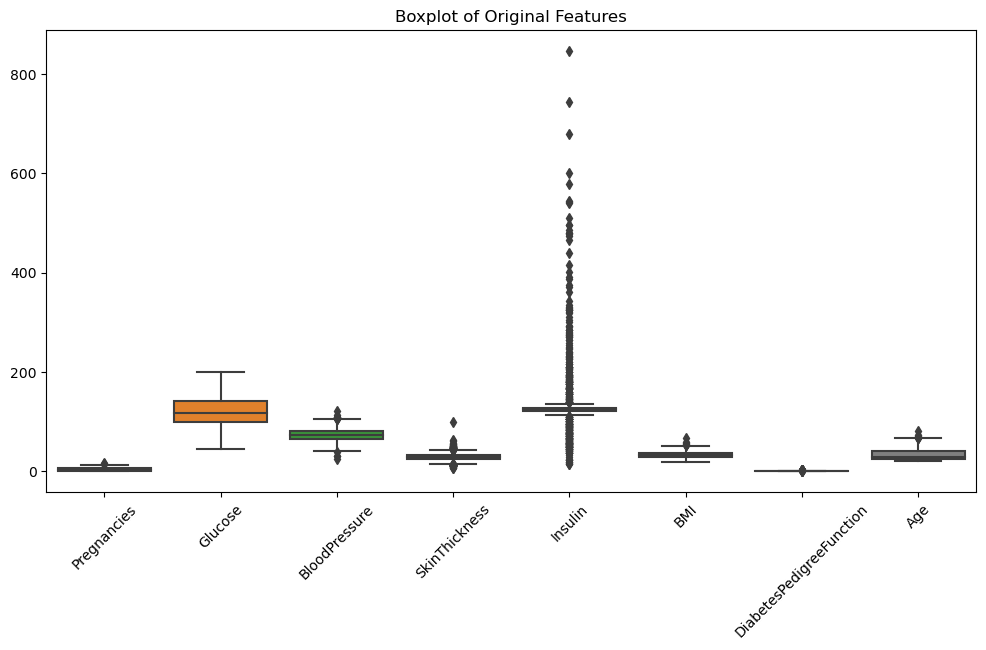

In [281]:
#Displaying the boxplots to analyze feature scaling 

def plot_boxplots(X,title):
    plt.figure(figsize=(12,6))
    sns.boxplot(data=X)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
#Calling the function 
plot_boxplots(X, 'Boxplot of Original Features')

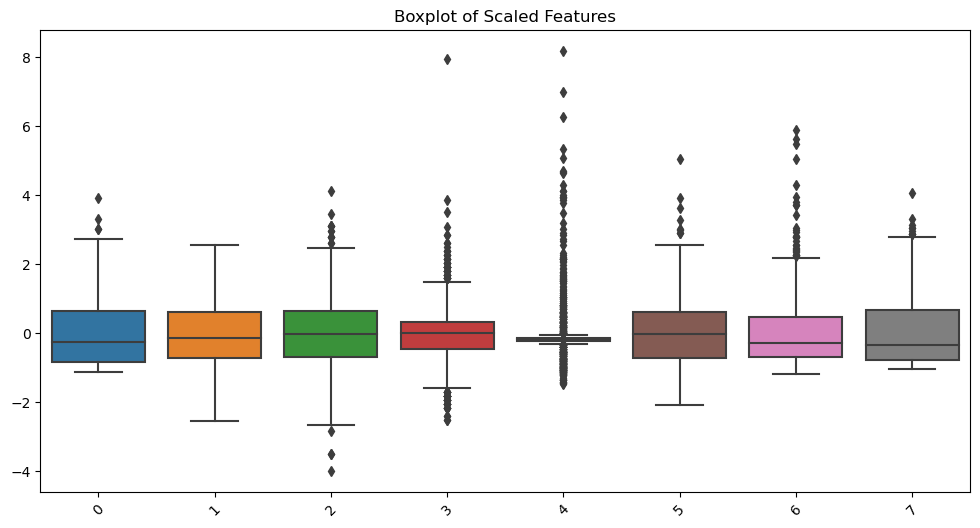

In [283]:
#scaling the features 
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

#Calling the function 
X_scaled = scale_features(X)
#Plotting boxplot for scaled features 
plot_boxplots(X_scaled, 'Boxplot of Scaled Features')

In [285]:
# Training the Preceptron model
def train_perceptron(X_train, y_train):
    perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron_model.fit(X_train, y_train)
    return perceptron_model

In [293]:
def evaluate_perceptron(X_train, X_test, y_train, y_test):
    model = train_perceptron(X_train, y_train)

    #Making predictions on the test set
    predictions = model.predict(X_test)

    #calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Perceptron classification accuracy:{accuracy:.4f}")

    #using StratifiedKFold with fewer splits to avoid the warning
    skf = StratifiedKFold(n_splits=2)
    scores = cross_val_score(model, X_train, y_train, cv=skf)
    print(f"cross-validated accuracy:{np.mean(scores):.4f}")

    #Displaying confusion matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot= True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.show()

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


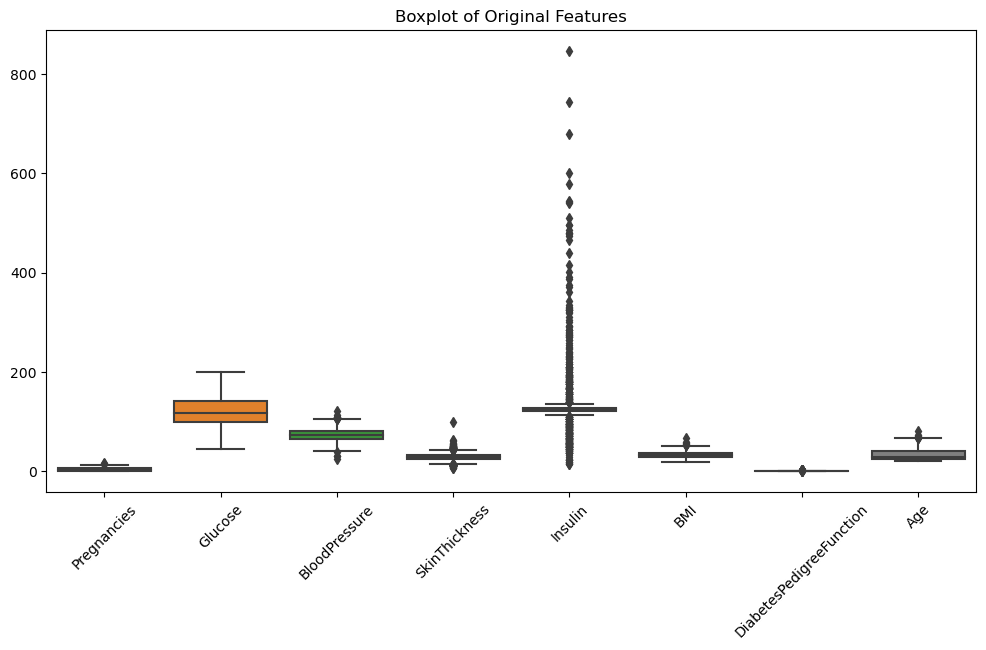

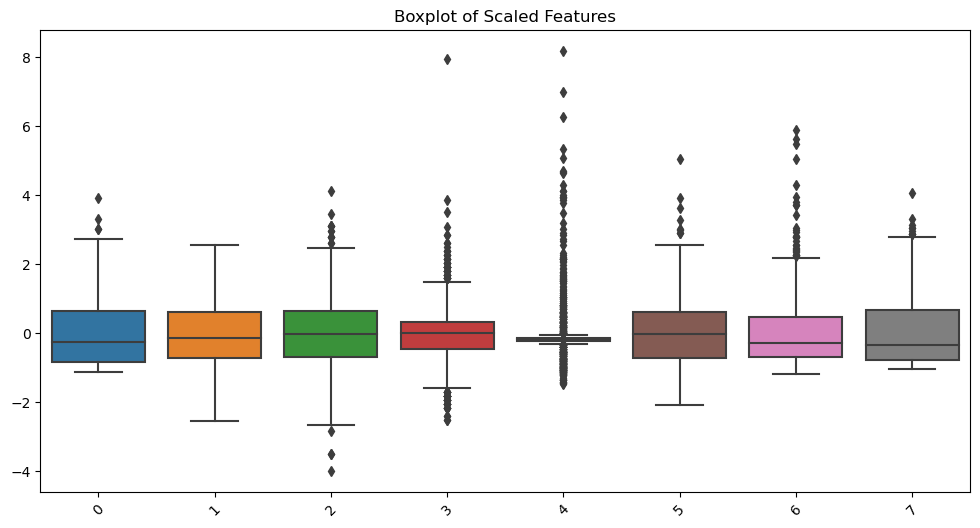

Perceptron classification accuracy:0.7532
cross-validated accuracy:0.6531


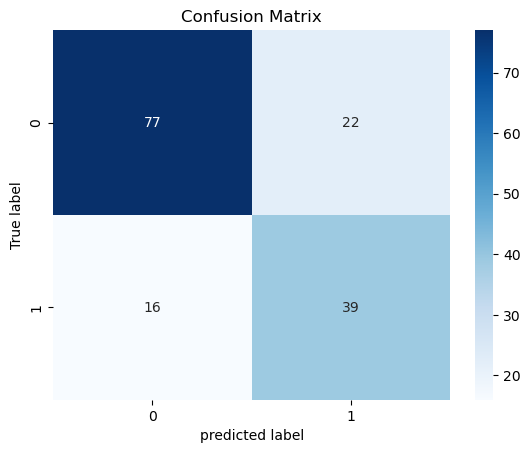

In [297]:
#Main function to execute the steps

def main():
    #Loading the dataset
    X, y = load_and_preprocess_data()

    
    #Displaying boxplot of the original features
    plot_boxplots(X, 'Boxplot of Original Features')

    #Scaling the features
    X_scaled = scale_features(X)

    #Displaying boxplot of the scaled features
    plot_boxplots(X_scaled, 'Boxplot of Scaled Features')

    #Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    #Train and evaluate the perceptron model
    
    evaluate_perceptron(X_train, X_test, y_train, y_test)
                              
#Running the main function
main()
